# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [23]:
# Libraries
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
import pymysql

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [9]:
# your code here
driver  = 'mysql+pymysql:'
user     = 'root'
password = 'Tarradellas90'
ip       = ':3306'
database = 'employees'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
conn = create_engine(connection_string)
print(connection_string)
print(conn)



mysql+pymysql://root:Tarradellas90@:3306/employees
Engine(mysql+pymysql://root:***@:3306/employees)


In [91]:
employees = pd.read_sql('SELECT * from employees', conn)
original = employees
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [16]:
employees.shape

(9, 7)

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [26]:
# Method 1
# your code here
dep_sal = employees['Salary'].groupby(employees['Department']).mean()
dep_sal

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [24]:
# Method 2
# your code here
#vehicles.pivot_table(index=["Vehicle Class"], values=["Combined MPG"], aggfunc=np.sum)

employees.pivot_table(index=['Department'], values=['Salary'], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [27]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [30]:
# your code here
employees.pivot_table(index=['Title'], columns=['Years'], values=['Salary'], fill_value= 0)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [74]:
# your code here
#to combine two aggregates functions we use a dictionary
#{'D': np.mean,'E': np.mean}
employees1=employees.pivot_table(index=['Department','Title'], aggfunc={'Name':'count','Salary':np.mean})
employees1


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [81]:
# your code here
employees_desc = employees.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary': ['median','min','max','std']})
employees_desc

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

In [ ]:
"""
your commments here
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [85]:
# your code here
employees.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary': ['median','min','max','std']}, fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [87]:
# your code here
employees.pivot_table(index=['Department'], values=['Name','Salary'], aggfunc={'Name':'count','Salary':'sum'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [90]:
# your code here
employees.pivot_table(index=['Department','Title'], values=['Years','Salary'], aggfunc={'Years':'count','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [102]:
# your code here
employees.pivot_table(index=['Department'], values=['Salary'], aggfunc= lambda x: np.mean(x-max(x)))

,Salary
Department,
HR,-25.00
IT,-21.25
Sales,0.00


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [103]:
# your code here
driver  = 'mysql+pymysql:'
user     = 'root'
password = 'Tarradellas90'
ip       = ':3306'
database = 'fitbit'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
conn = create_engine(connection_string)
print(connection_string)
print(conn)

mysql+pymysql://root:Tarradellas90@:3306/fitbit
Engine(mysql+pymysql://root:***@:3306/fitbit)


In [105]:
fitbit = pd.read_sql('SELECT * from fitbit', conn)
fitbit

c:\program files\python38\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xE1ndar ...' for column 'VARIABLE_VALUE' at row 485")
  result = self._query(query)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.0,275,49,79,236,377,33,18,410\r
363,04-05-2016,3525,16382,12.39,16,684.0,333,10,55,2075,406,21,8,427\r
364,05-05-2016,3649,21913,16.4,19,701.0,287,29,90,2249,280,35,15,315\r
365,06-05-2016,3539,19023,14.79,15,575.0,298,8,85,2112,370,42,22,412\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [138]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185
std,916.307036,5594.836225,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622
min,179.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000
50%,2974.000000,10413.000000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000
75%,3233.000000,13916.500000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000
max,4351.000000,26444.000000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000


In [110]:
fitbit.dtypes

Date                      object
Calorie burned             int64
Steps                      int64
Distance                  object
Floors                     int64
Minutes Sedentary         object
Minutes Lightly Active     int64
Minutes Fairly Active      int64
Minutes Very Active        int64
Activity Calories          int64
MinutesOfSleep             int64
MinutesOfBeingAwake        int64
NumberOfAwakings           int64
LengthOfRestInMinutes     object
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [112]:
# your code here
corr_1 = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
print('The correlation between the minutes very active and the steps is:', corr_1)

The correlation between the minutes very active and the steps is: 0.5714518481062606


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [113]:
import matplotlib.pyplot as plt;

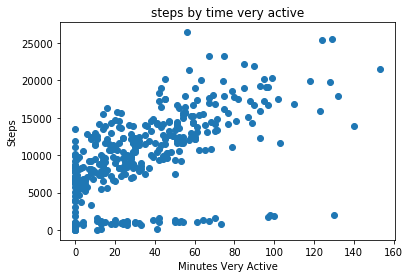

In [115]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('steps by time very active')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [121]:
fitbit['Minutes Sedentary'] = fitbit['Minutes Sedentary'].astype(float)

In [122]:
# your code here
corr_2 = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
corr_2

0.07690608062990097

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

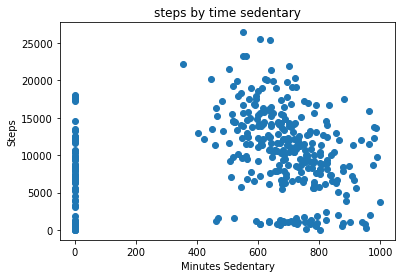

In [125]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('steps by time sedentary')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()


In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [127]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

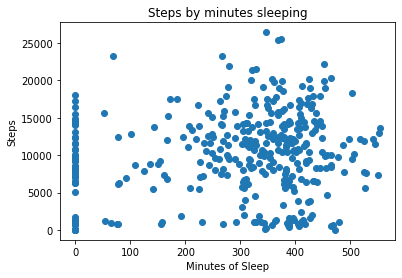

In [128]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Steps by minutes sleeping')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [130]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [135]:
# your code here
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


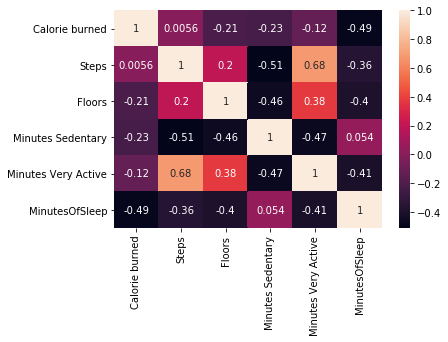

In [137]:
import seaborn as sns
sns.heatmap(cor_fit.corr(), annot=True)

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [146]:
# your code here
import regex
driver  = 'mysql+pymysql:'
user     = 'root'
password = 'Tarradellas90'
ip       = ':3306'
database = 'time_grades'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
conn = create_engine(connection_string)
print(connection_string)
print(conn)

mysql+pymysql://root:Tarradellas90@:3306/time_grades
Engine(mysql+pymysql://root:***@:3306/time_grades)


In [143]:

time_grades = pd.read_sql('SELECT * from time_grades', conn)
time_grades

,Name,Study time,Grade
0,Jose,4,4\r
1,Maria,9,7\r
2,David,8,9\r
3,Sonia,10,7\r
4,Samuel,20,9\r
5,Eva,5,3\r
6,Carlos,12,7\r
7,Pedro,6,5\r
8,Ana,18,9\r
9,Gervasio,7,3\r


#### Show visually the frequency distribution of the `time_grades` dataset.

In [165]:
# your code here
##airbnb_col_12['adjusted_price'] = airbnb_col_12.adjusted_price.str.replace('$', '', regex=True)
time_grades['Grade'] = time_grades.Grade.str.replace('\r', '', regex = True)
time_grades_sort = time_grades.sort_values(by = 'Grade')
time_grades_sort

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


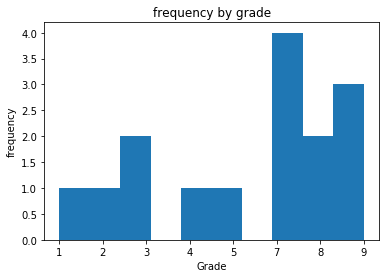

In [169]:
plt.hist(time_grades_sort['Grade'])
plt.title('frequency by grade')
plt.xlabel('Grade')
plt.ylabel('frequency')
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [179]:
# your code here
#Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
#Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
from scipy.stats import pearsonr

In [180]:
corr_pearson = pearsonr(time_grades_sort['Grade'], time_grades_sort['Study time'])

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

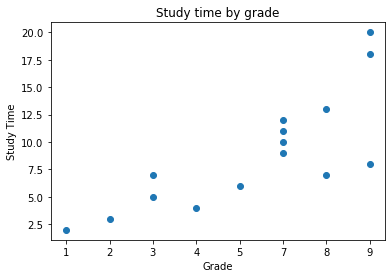

In [172]:
# your code here
plt.scatter(time_grades_sort['Grade'], time_grades_sort['Study time'])
plt.title('Study time by grade')
plt.xlabel('Grade')
plt.ylabel('Study Time')
plt.show()

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""